In [ ]:
import pandas as pd

df = pd.read_csv("data/Microsoft_Stock.csv")

print(df.shape)
print(df.head())
df.info()

print(df.isnull().sum())

  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.2-cp312-cp312-win_amd64.whl (12.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


(1511, 6)
                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [6]:
%pip install scikit-learn

from sklearn.preprocessing import StandardScaler

df['Date'] = pd.to_datetime(df['Date'])

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.16.0-cp312-cp312-win_amd64.whl (38.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,-1.178453,-1.179805,-1.179166,-1.176745,0.467906
1,2015-04-02 16:00:00,-1.177395,-1.180153,-1.182562,-1.184331,0.511572
2,2015-04-06 16:00:00,-1.183041,-1.162023,-1.181490,-1.162103,0.633430
3,2015-04-07 16:00:00,-1.160632,-1.159757,-1.161296,-1.162456,-0.097505
4,2015-04-08 16:00:00,-1.162925,-1.163592,-1.166121,-1.164396,-0.382174


In [7]:
# Create new time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

df[['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsMonthStart', 'IsMonthEnd', 'WeekOfYear']].head()

,Date,Year,Month,Day,DayOfWeek,IsMonthStart,IsMonthEnd,WeekOfYear
0,2015-04-01 16:00:00,2015,4,1,2,1,0,14
1,2015-04-02 16:00:00,2015,4,2,3,0,0,14
2,2015-04-06 16:00:00,2015,4,6,0,0,0,15
3,2015-04-07 16:00:00,2015,4,7,1,0,0,15
4,2015-04-08 16:00:00,2015,4,8,2,0,0,15


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


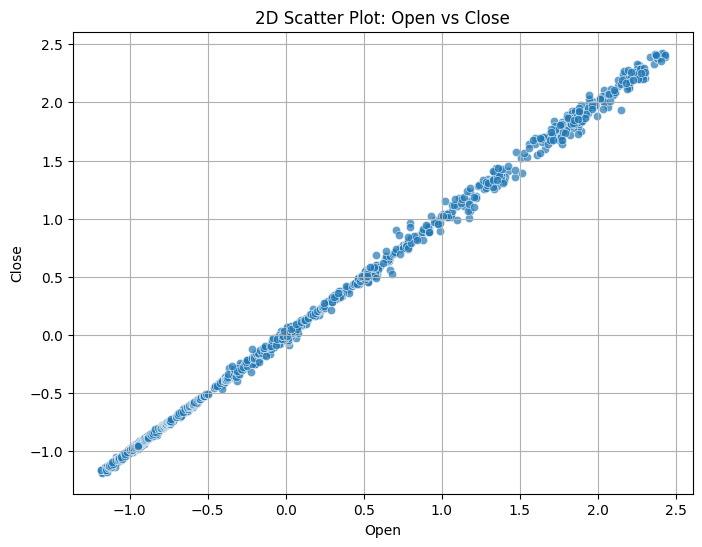

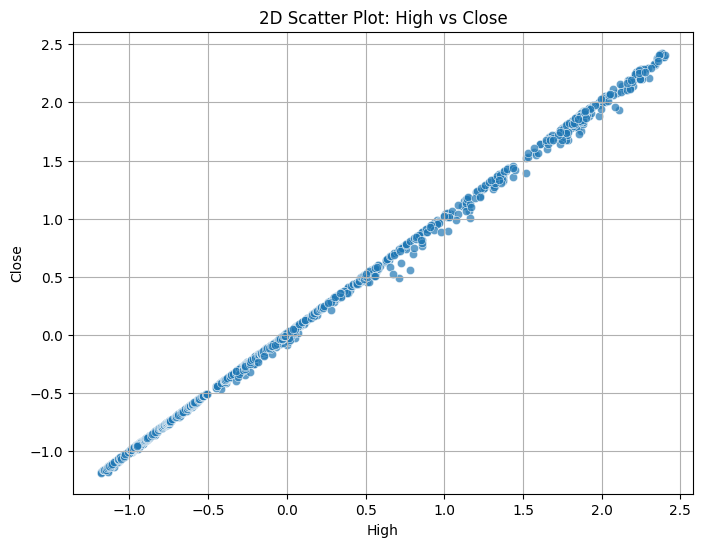

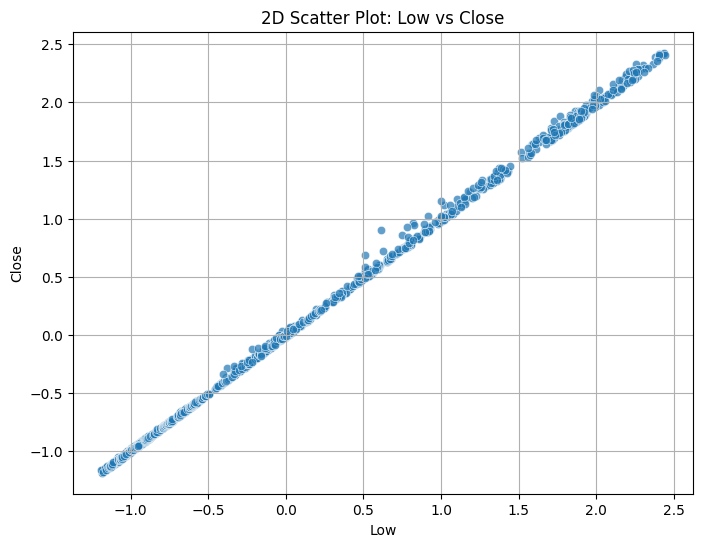

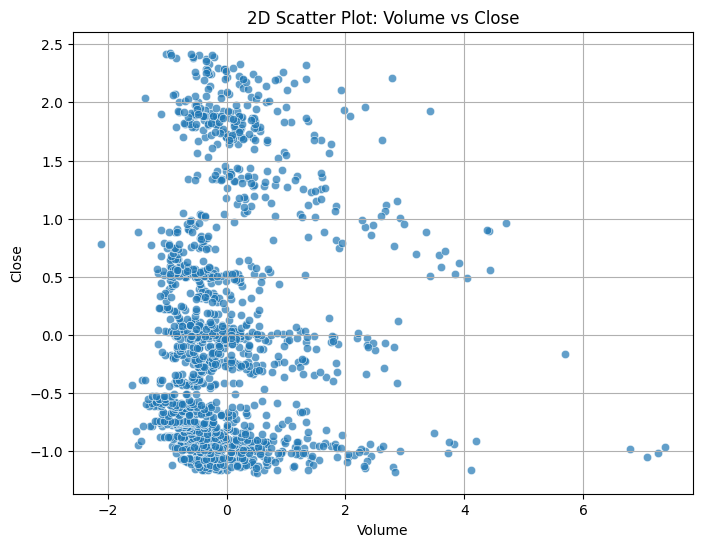

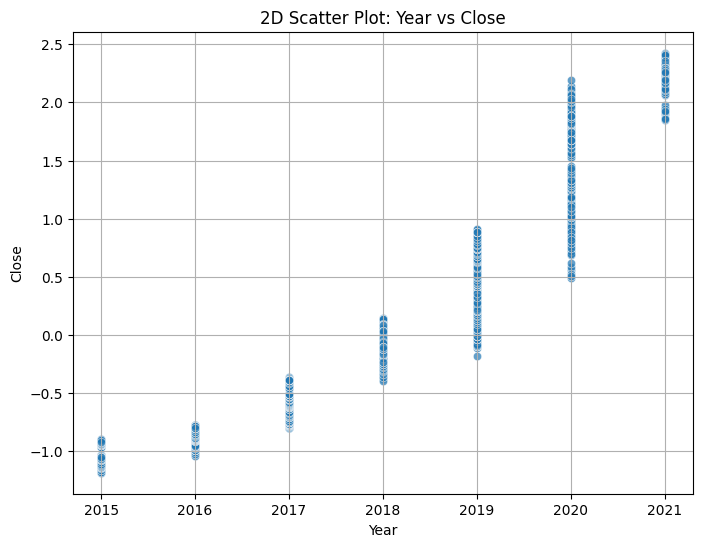

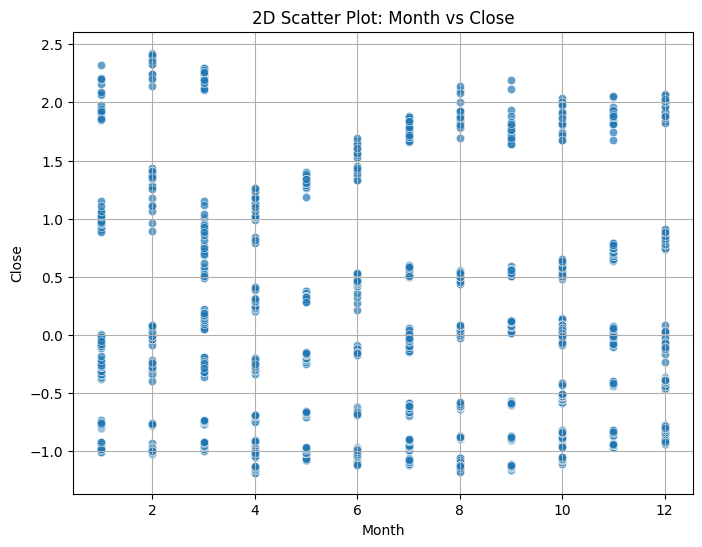

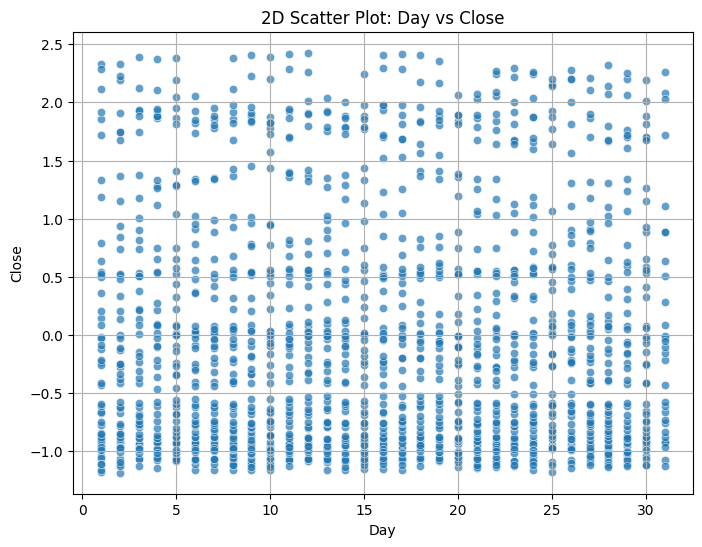

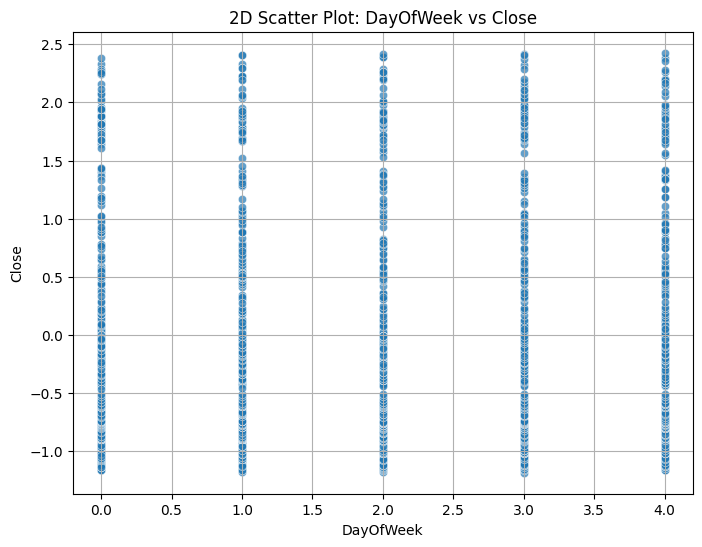

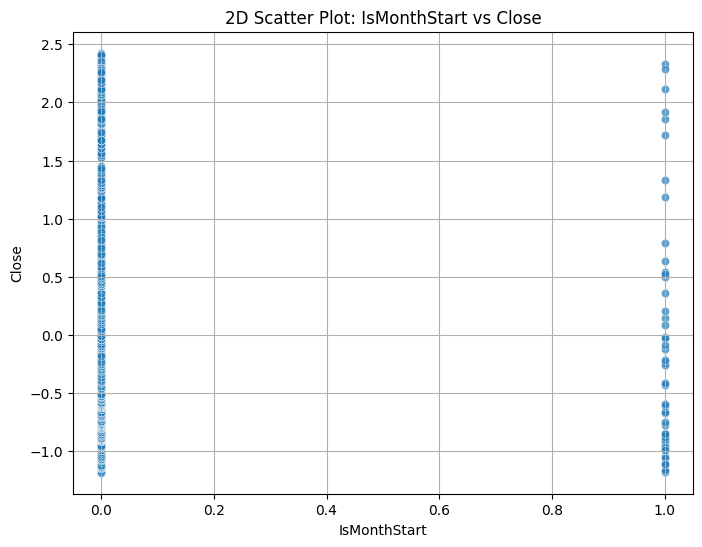

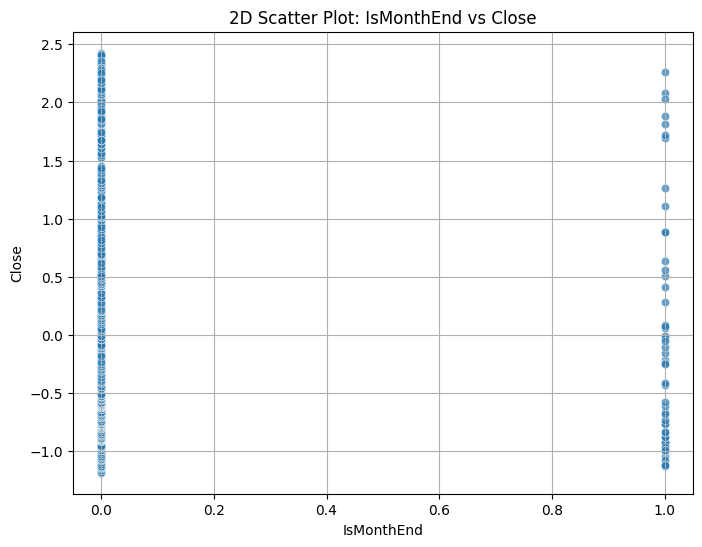

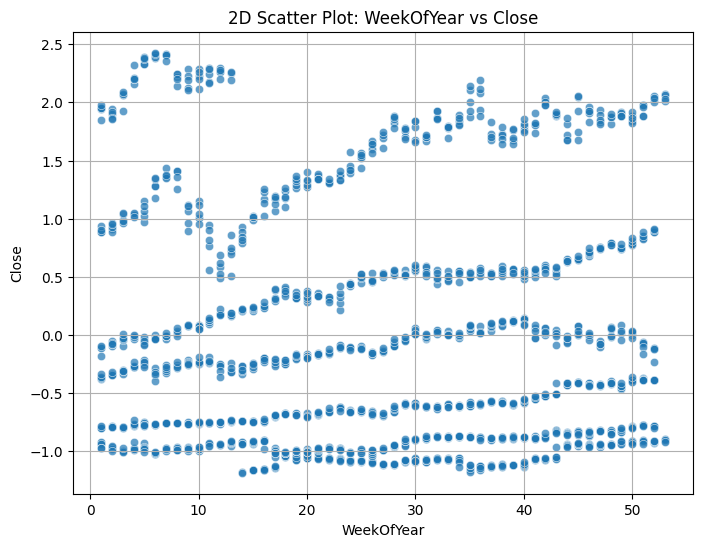

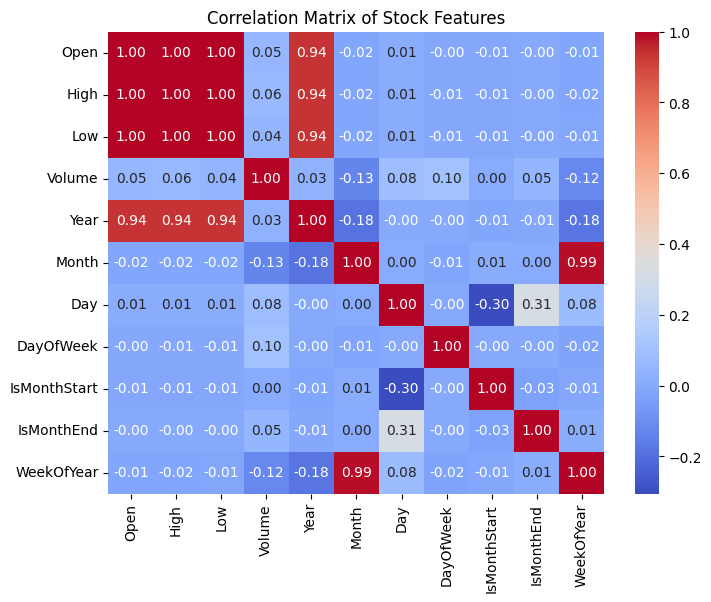

In [9]:
%pip install seaborn
%pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

#  numerical columns for plotting
numeric_cols = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsMonthStart', 'IsMonthEnd', 'WeekOfYear']

# 1. 2D Scatter Plot Matrix (Pairplot)
for i in range(len(numeric_cols)):
    x_feature = numeric_cols[i]  
    y_feature = 'Close'  
    # 2D Scatter Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_feature, y=y_feature, alpha=0.7)
    plt.title(f"2D Scatter Plot: {x_feature} vs {y_feature}")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.grid(True)
    plt.show()

# 2. Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Stock Features")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA


df.set_index('Date', inplace=True)
ts = df['Close']

train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# ADF Test
adf_result = adfuller(train)
print("ADF Statistic: ", adf_result[0])
print("p-value: ", adf_result[1])
d = 0 if adf_result[1] <= 0.05 else 1
print("Using differencing d =", d)

#  Differencing for ACF/PACF plotting
train_diff = train.diff().dropna() if d == 1 else train

# ACF and PACF plots
plt.figure(figsize=(12, 4))
plot_acf(train_diff, lags=30)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(train_diff, lags=30)
plt.title("PACF Plot")
plt.show()

# Auto ARIMA to select best (p,d,q)
print("\nRunning auto_arima...")
auto_model = pm.auto_arima(
    train, 
    seasonal=False, 
    d=d, 
    stepwise=True, 
    trace=True, 
    suppress_warnings=True,
    error_action='ignore'
)
order = auto_model.order
print("Selected ARIMA order:", order)

#Fit ARIMA model
model = ARIMA(train, order=order)
model_fit = model.fit()

# Forecast
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

#  Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title("Auto ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)
print(f"\n📊 Evaluation Metrics:\nMAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}")
